# K-NN algorithm is a supervised learning technique and used for both classification and regression problems, the math behind this algorithm is distance, i.e it will take the k value, it may be 1,2,3,20 or 50. k value specifies those many nearest neighbors for your sample which you need to determine in which class it is going to fall. In classification, if k is 1, then the sample is going to assign the class of nearest neighbor, while in regression the output is the value, i.e the average of the nearest neighbors values. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv('C:/Users/navyakiran/Desktop/python/Regression/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132260,0.140849,-0.081541,-0.068235,0.017427,-0.033785,0.548731,0.223779
Glucose,0.132260,1.000000,0.154378,0.057069,0.323265,0.222407,0.138372,0.259002,0.464728
BloodPressure,0.140849,0.154378,1.000000,0.207499,0.095836,0.281709,0.041135,0.241666,0.065996
SkinThickness,-0.081541,0.057069,0.207499,1.000000,0.448584,0.392642,0.183981,-0.114774,0.074569
Insulin,-0.068235,0.323265,0.095836,0.448584,1.000000,0.205982,0.192653,-0.063218,0.122430
BMI,0.017427,0.222407,0.281709,0.392642,0.205982,1.000000,0.140587,0.037046,0.293491
DiabetesPedigreeFunction,-0.033785,0.138372,0.041135,0.183981,0.192653,0.140587,1.000000,0.034308,0.174459
Age,0.548731,0.259002,0.241666,-0.114774,-0.063218,0.037046,0.034308,1.000000,0.235477
Outcome,0.223779,0.464728,0.065996,0.074569,0.122430,0.293491,0.174459,0.235477,1.000000


In [8]:
np.where(data['Insulin']==846)

(array([13], dtype=int64),)

In [9]:
outlier=data.iloc[[13],:]
outlier

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


In [10]:
data=data.drop([13])

In [20]:
data[11:15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1


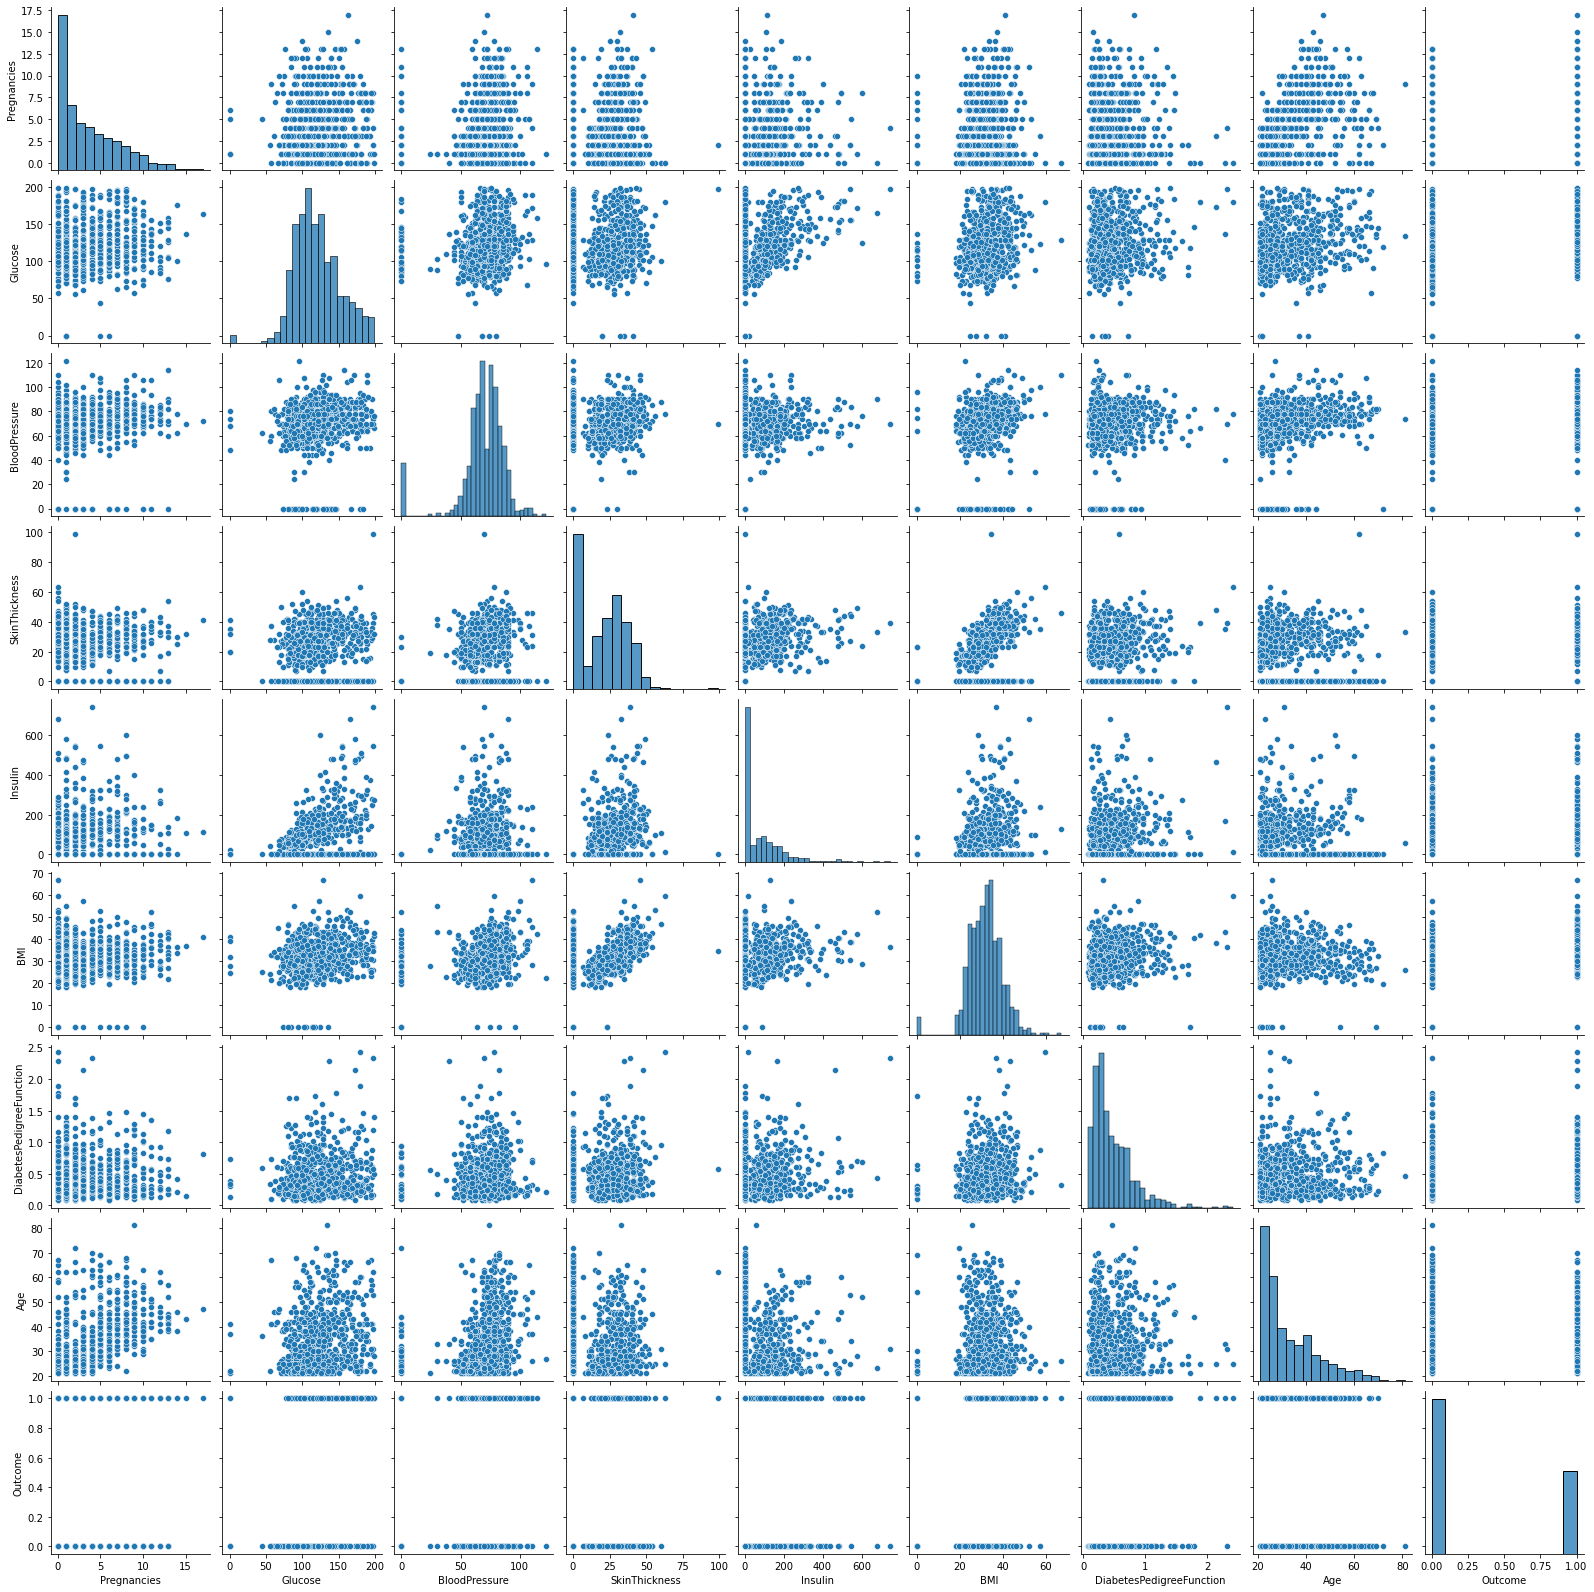

In [21]:
sn.pairplot(data)

In [23]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

C:\Users\navyakiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


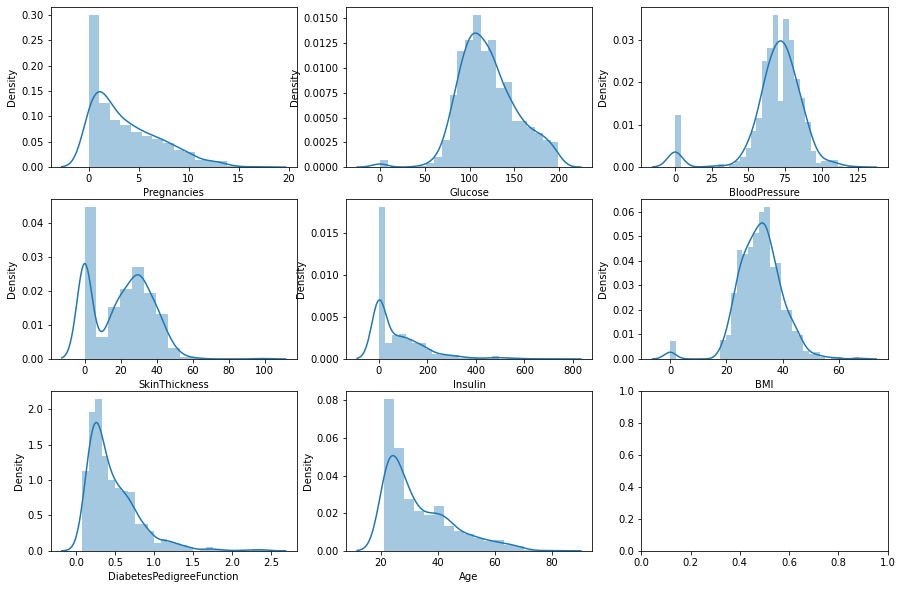

In [24]:
fig, ax=plt.subplots(3,3,figsize=(15,10))
for var, subplot in zip(columns, ax.flatten()):
    sn.distplot(data[var],ax=subplot)
    import warnings
    warnings.filterwarnings('ignore')

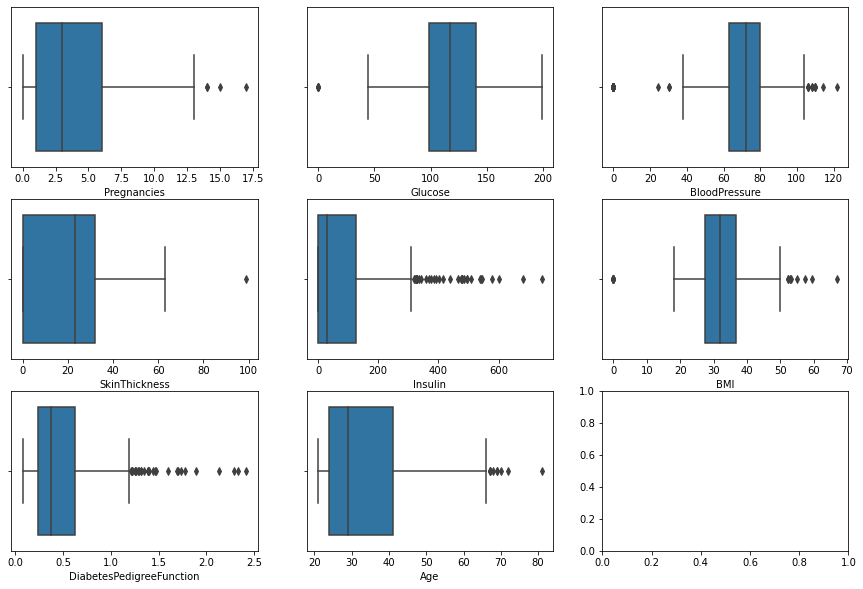

In [14]:
fig, ax=plt.subplots(3,3,figsize=(15,10))
for var, subplot in zip(columns,ax.flatten()):
    sn.boxplot(data[var],ax=subplot)

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.805737,69.117340,20.533246,78.800522,31.995046,0.471973,33.207301,0.348110
std,3.370207,31.898584,19.365639,15.962378,111.942477,7.889008,0.331534,11.730995,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [29]:
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [30]:
zeroes=np.where(data[features]==0)
zeroes

(array([  0,   1,   2,   2,   4,   5,   5,   7,   7,   7,   9,   9,   9,
         10,  10,  11,  11,  12,  12,  14,  14,  14,  15,  16,  16,  20,
         20,  21,  21,  22,  25,  25,  28,  28,  29,  32,  32,  33,  35,
         35,  36,  37,  40,  40,  41,  43,  43,  44,  44,  45,  45,  46,
         47,  48,  48,  48,  48,  54,  56,  57,  57,  57,  58,  59,  59,
         59,  59,  60,  60,  61,  61,  63,  63,  64,  65,  65,  66,  66,
         71,  71,  73,  74,  74,  75,  75,  76,  77,  77,  77,  77,  78,
         79,  80,  80,  80,  80,  82,  82,  83,  83,  85,  88,  89,  89,
         92,  92,  95,  99,  99, 100, 100, 101, 101, 101, 103, 103, 105,
        105, 108, 112, 112, 114, 114, 115, 115, 116, 116, 117, 119, 120,
        122, 122, 123, 123, 123, 128, 128, 128, 130, 130, 132, 135, 136,
        137, 137, 137, 139, 139, 140, 142, 142, 144, 144, 144, 145, 147,
        147, 148, 150, 150, 153, 153, 154, 159, 161, 162, 163, 163, 163,
        165, 166, 166, 167, 167, 169, 169, 171, 171

In [32]:
x=x.replace(0,np.nan)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [33]:
data=pd.concat([x, y],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [34]:
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [35]:
data['Pregnancies'].mean()

4.5

In [36]:
data['Pregnancies']=data['Pregnancies'].fillna(data['Pregnancies'].mean())

In [37]:
data['Glucose'].mean()

121.5984251968504

In [38]:
data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())

In [39]:
data['BloodPressure'].mean()

72.42213114754098

In [40]:
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())

In [41]:
data['SkinThickness'].mean()

29.164814814814815

In [42]:
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].mean())

In [43]:
data['Insulin'].mean()

153.7913486005089

In [44]:
data['Insulin']=data['Insulin'].fillna(data['Insulin'].mean())

In [45]:
data['BMI'].mean()

32.46058201058199

In [46]:
data['BMI']=data['BMI'].fillna(data['Insulin'].mean())

In [47]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,4.500000,121.598425,72.422131,29.164815,153.791349,34.200658,0.471973,33.207301,0.348110
std,2.974654,30.358414,12.095927,8.793863,81.327039,15.990332,0.331534,11.730995,0.476682
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,4.500000,117.000000,72.422131,29.164815,153.791349,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,153.791349,36.850000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,153.791349,2.420000,81.000000,1.000000


In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,153.791349,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,153.791349,26.6,0.351,31,0
2,8.0,183.0,64.0,29.164815,153.791349,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4.5,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


<AxesSubplot:xlabel='Insulin'>

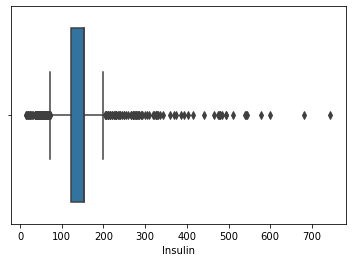

In [50]:
sn.boxplot(data['Insulin'])

In [51]:
np.where(data['Insulin']==744)

(array([227], dtype=int64),)

In [52]:
data=data.drop([228])

In [53]:
data['Insulin'].max()

680.0

In [54]:
np.where(data['Insulin']==680)

(array([245], dtype=int64),)

In [55]:
data[240:248]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
242,3.0,139.0,54.0,29.164815,153.791349,25.6,0.402,22,1
243,6.0,119.0,50.0,22.000000,176.000000,27.1,1.318,33,1
244,2.0,146.0,76.0,35.000000,194.000000,38.2,0.329,29,0
245,9.0,184.0,85.0,15.000000,153.791349,30.0,1.213,49,1
246,10.0,122.0,68.0,29.164815,153.791349,31.2,0.258,41,0
247,4.5,165.0,90.0,33.000000,680.000000,52.3,0.427,23,0
248,9.0,124.0,70.0,33.000000,402.000000,35.4,0.282,34,0
249,1.0,111.0,86.0,19.000000,153.791349,30.1,0.143,23,0


In [56]:
data=data.drop([247])

In [57]:
np.where(data['Insulin']==600)

(array([581], dtype=int64),)

In [58]:
data[576:585]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2.0,197.0,70.0,99.000000,153.791349,34.7,0.575,62,1
580,4.5,151.0,90.0,46.000000,153.791349,42.1,0.371,21,1
581,6.0,109.0,60.0,27.000000,153.791349,25.0,0.206,27,0
582,12.0,121.0,78.0,17.000000,153.791349,26.5,0.259,62,0
583,8.0,100.0,76.0,29.164815,153.791349,38.7,0.190,42,0
584,8.0,124.0,76.0,24.000000,600.000000,28.7,0.687,52,1
585,1.0,93.0,56.0,11.000000,153.791349,22.5,0.417,22,0
586,8.0,143.0,66.0,29.164815,153.791349,34.9,0.129,41,1
587,6.0,103.0,66.0,29.164815,153.791349,24.3,0.249,29,0


In [59]:
data=data.drop([584])

In [60]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,4.496073,121.439780,72.397611,29.153682,151.746027,34.180896,0.469319,33.198953,0.348168
std,2.977744,30.253993,12.101929,8.800849,74.535265,16.006826,0.325203,11.728233,0.476702
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,25.000000,120.000000,27.500000,0.242500,24.000000,0.000000
50%,4.500000,117.000000,72.211066,29.164815,153.791349,32.400000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,153.791349,36.825000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,579.000000,153.791349,2.420000,81.000000,1.000000


In [61]:
np.where(data['Insulin']==579)

(array([406], dtype=int64),)

In [62]:
data[400:410]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
403,9.0,72.0,78.0,25.000000,153.791349,31.6,0.280,38,0
404,5.0,168.0,64.0,29.164815,153.791349,32.9,0.135,41,1
405,2.0,123.0,48.0,32.000000,165.000000,42.1,0.520,26,0
406,4.0,115.0,72.0,29.164815,153.791349,28.9,0.376,46,1
407,4.5,101.0,62.0,29.164815,153.791349,21.9,0.336,25,0
408,8.0,197.0,74.0,29.164815,153.791349,25.9,1.191,39,1
409,1.0,172.0,68.0,49.000000,579.000000,42.4,0.702,28,1
410,6.0,102.0,90.0,39.000000,153.791349,35.7,0.674,28,0
411,1.0,112.0,72.0,30.000000,176.000000,34.4,0.528,25,0
412,1.0,143.0,84.0,23.000000,310.000000,42.4,1.076,22,0


In [63]:
data=data.drop([409])

In [64]:
data['Insulin'].value_counts()

153.791349    374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
272.000000      1
41.000000       1
25.000000       1
166.000000      1
59.000000       1
Name: Insulin, Length: 181, dtype: int64

<AxesSubplot:xlabel='Insulin'>

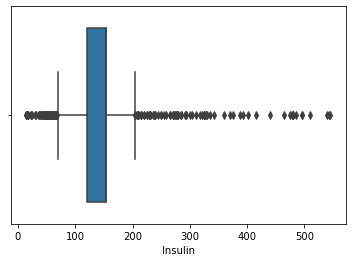

In [65]:
sn.boxplot(data['Insulin'])

<AxesSubplot:xlabel='BMI'>

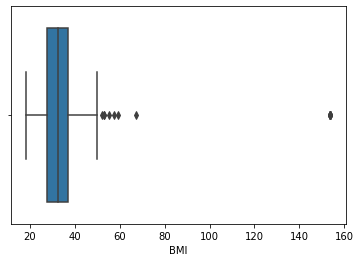

In [66]:
import seaborn as sn
sn.boxplot(data['BMI'])

In [67]:
data['BMI'].max()

153.79134860050934

In [68]:
np.where(data['BMI']==153.79134860050934)

(array([  9,  48,  59,  80, 144, 368, 422, 490, 518, 679, 701], dtype=int64),)

In [69]:
data=data.drop([9,49,60,81,145,371,426,494,522,684,706])

<AxesSubplot:xlabel='BMI'>

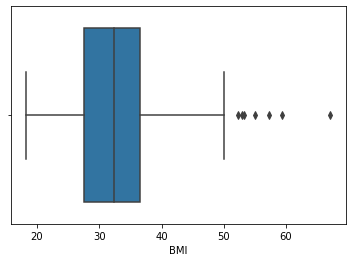

In [70]:
import seaborn as sn
sn.boxplot(data['BMI'])

In [71]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,4.491356,121.623660,72.366781,29.143523,151.234110,32.420346,0.469537,33.246011,0.349734
std,2.984022,30.282542,12.157413,8.835562,73.455050,6.896905,0.323320,11.671120,0.477203
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,120.000000,27.475000,0.243750,24.000000,0.000000
50%,4.500000,117.000000,72.000000,29.164815,153.791349,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,153.791349,36.600000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,545.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='SkinThickness'>

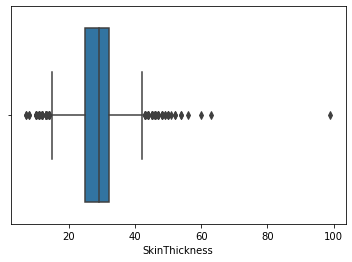

In [72]:
sn.boxplot(data['SkinThickness'])

In [73]:
np.max(data['SkinThickness'])

99.0

In [74]:
np.where(data['SkinThickness']==99.0)

(array([566], dtype=int64),)

In [75]:
data[563:569]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
576,6.0,108.0,44.0,20.000000,130.000000,24.0,0.813,35,0
577,2.0,118.0,80.0,29.164815,153.791349,42.9,0.693,21,1
578,10.0,133.0,68.0,29.164815,153.791349,27.0,0.245,36,0
579,2.0,197.0,70.0,99.000000,153.791349,34.7,0.575,62,1
580,4.5,151.0,90.0,46.000000,153.791349,42.1,0.371,21,1
581,6.0,109.0,60.0,27.000000,153.791349,25.0,0.206,27,0


In [76]:
data=data.drop([579])

<AxesSubplot:xlabel='BloodPressure'>

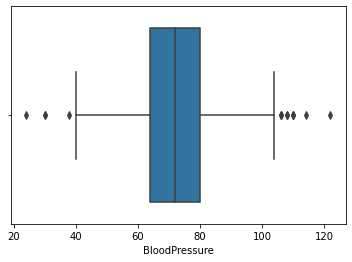

In [77]:
import seaborn as sn
sn.boxplot(data['BloodPressure'])

<AxesSubplot:xlabel='Glucose'>

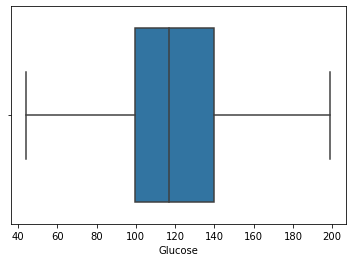

In [78]:
sn.boxplot(data['Glucose'])

<AxesSubplot:xlabel='Pregnancies'>

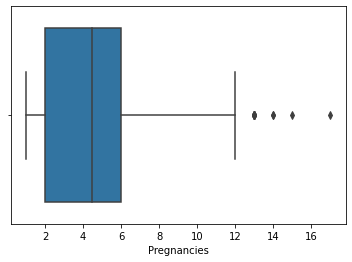

In [79]:
sn.boxplot(data['Pregnancies'])

In [80]:
np.max(data['Pregnancies'])

17.0

In [81]:
np.where(data['Pregnancies']==17.0)

(array([153], dtype=int64),)

In [82]:
data[152:158]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2.0,88.0,74.0,19.0,53.000000,29.0,0.229,22,0
159,17.0,163.0,72.0,41.0,114.000000,40.9,0.817,47,1
160,4.0,151.0,90.0,38.0,153.791349,29.7,0.294,36,0
161,7.0,102.0,74.0,40.0,105.000000,37.2,0.204,45,0
162,4.5,114.0,80.0,34.0,285.000000,44.2,0.167,27,0
163,2.0,100.0,64.0,23.0,153.791349,29.7,0.368,21,0


In [83]:
data=data.drop([159])

In [84]:
np.max(data['Pregnancies'])

15.0

In [85]:
np.where(data['Pregnancies']==15)

(array([83], dtype=int64),)

In [86]:
data[82:88]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
87,2.0,100.0,68.0,25.000000,71.000000,38.5,0.324,26,0
88,15.0,136.0,70.0,32.000000,110.000000,37.1,0.153,43,1
89,1.0,107.0,68.0,19.000000,153.791349,26.5,0.165,24,0
90,1.0,80.0,55.0,29.164815,153.791349,19.1,0.258,21,0
91,4.0,123.0,80.0,15.000000,176.000000,32.0,0.443,34,0
92,7.0,81.0,78.0,40.000000,48.000000,46.7,0.261,42,0


In [87]:
data=data.drop([88])

In [88]:
np.max(data['Pregnancies'])

14.0

In [89]:
np.where(data['Pregnancies']==14.0)

(array([288, 442], dtype=int64),)

In [90]:
data[440:445]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2.0,119.0,72.422131,29.164815,153.791349,19.6,0.832,72,0
454,2.0,100.0,54.000000,28.000000,105.000000,37.8,0.498,24,0
455,14.0,175.0,62.000000,30.000000,153.791349,33.6,0.212,38,1
456,1.0,135.0,54.000000,29.164815,153.791349,26.7,0.687,62,0
457,5.0,86.0,68.000000,28.000000,71.000000,30.2,0.364,24,0


In [91]:
data=data.drop([298,455])

In [92]:
np.max(data['Pregnancies'])

13.0

In [93]:
np.where(data['Pregnancies']==13.0)

(array([ 26,  68,  81, 264, 312, 346, 502, 616, 671, 723], dtype=int64),)

In [94]:
data[723:725]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
744,13.0,153.0,88.0,37.0,140.0,40.6,1.174,39,0
745,12.0,100.0,84.0,33.0,105.0,30.0,0.488,46,0


In [95]:
data=data.drop([28,72,86,274,323,357,518,635,691,744])

<AxesSubplot:xlabel='Pregnancies'>

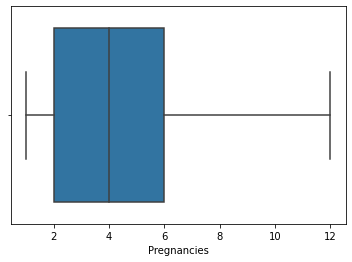

In [96]:
import seaborn as sn
sn.boxplot(data['Pregnancies'])

In [97]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
Sc=StandardScaler()

In [101]:
x=Sc.fit_transform(x)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=41)

In [116]:
k=np.arange(1,25)
test_accuracy=np.empty(len(k))
train_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    test_accuracy[i]=knn.score(xtest,ytest)
    train_accuracy[i]=knn.score(xtrain,ytrain)
    print(test_accuracy[i])
    print(train_accuracy[i])

0.7657657657657657
1.0
0.7702702702702703
0.8233009708737864
0.7927927927927928
0.8194174757281554
0.7927927927927928
0.7902912621359224
0.7792792792792793
0.8058252427184466
0.7927927927927928
0.7941747572815534
0.7882882882882883
0.8058252427184466
0.8063063063063063
0.8
0.7837837837837838
0.7922330097087379
0.7792792792792793
0.7902912621359224
0.7882882882882883
0.7883495145631068
0.7882882882882883
0.7941747572815534
0.7927927927927928
0.7941747572815534
0.7972972972972973
0.7864077669902912
0.7972972972972973
0.7844660194174757
0.7972972972972973
0.7864077669902912
0.8018018018018018
0.7825242718446602
0.7927927927927928
0.7844660194174757
0.7792792792792793
0.7786407766990291
0.7927927927927928
0.7708737864077669
0.8108108108108109
0.7766990291262136
0.8198198198198198
0.7708737864077669
0.8018018018018018
0.7689320388349514
0.7927927927927928
0.7708737864077669


In [117]:
k=np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

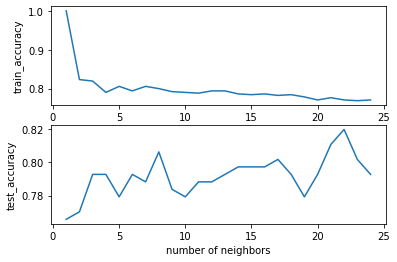

In [124]:
plt.subplot(211)
plt.plot(k,train_accuracy)
plt.xlabel('number of neighbors')
plt.ylabel('train_accuracy')
plt.subplot(212)
plt.plot(k,test_accuracy)
plt.xlabel('number of neighbors')
plt.ylabel('test_accuracy')
plt.show()

In [133]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x[0]

22

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
model=KNeighborsClassifier(n_neighbors=x[0])

In [136]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=22)

In [137]:
ypred=model.predict(xtest)

In [138]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [140]:
accuracy_score(ytest,ypred)

0.8198198198198198

In [141]:
confusion_matrix(ytest,ypred)

array([[137,  16],
       [ 24,  45]], dtype=int64)

In [142]:
[print(classification_report(ytest,ypred))]

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       153
           1       0.74      0.65      0.69        69

    accuracy                           0.82       222
   macro avg       0.79      0.77      0.78       222
weighted avg       0.82      0.82      0.82       222



[None]

In [143]:
from sklearn.model_selection import cross_val_score

In [147]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [156]:
m=cross_val_score(model,x,y,cv=20)
m.mean()

0.7519894894894895